In [21]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

In [22]:
# Load the saved model and tokenizer
model = load_model('best_model.h5')
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [23]:
# Load and preprocess the IMDB test dataset (7500 samples)
test_df = pd.read_csv('../../data/raw/IMDB Dataset.csv')  # Assuming same file as in notebook
test_df = test_df.sample(7500, random_state=42)  # Take 7500 samples

In [24]:
# Preprocess text data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

test_df['cleaned_review'] = test_df['review'].apply(clean_text)
test_df['sentiment_label'] = test_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Tokenize and pad sequences
max_length = 200
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_review'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [26]:
# Get true labels
y_true = test_df['sentiment_label'].values

# Make predictions
y_pred_prob = model.predict(test_padded)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step


In [27]:
# Print evaluation metrics
print("="*50)
print("Model Evaluation Metrics (on 7500 samples)")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\n")


Model Evaluation Metrics (on 7500 samples)
Accuracy: 0.5056
F1 Score: 0.6716
Precision: 0.5056
Recall: 1.0000




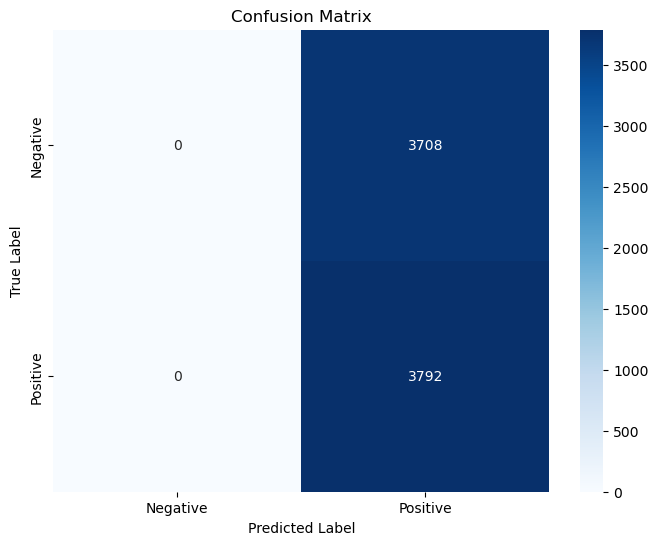

In [28]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Plot training history (assuming history object is available)
# If you have the history from training, you can plot it like this:
"""
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
"""

"\nplt.figure(figsize=(12, 4))\nplt.subplot(1, 2, 1)\nplt.plot(history.history['accuracy'], label='Train Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend()\n\nplt.subplot(1, 2, 2)\nplt.plot(history.history['loss'], label='Train Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend()\nplt.show()\n"